In [5]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction

## Motivation

Une entité ne peut être vivante si elle n'interagit pas avec son environnement. La vie, réduit à son plus simple appareil, comporte du code génétique. Pour se perpétuer, ce code génétique doit permettre de produire des molécules qui vont former le matériel nécessaire à sa protection, à son alimentation et enfin à sa reproduction. La cellule remplit ces rôles, aussi, sa membrane et les protéines qui la constituent lui permettent de jouer un rôle d'interface entre le code génétique et l'environnement. Il apparait que la notion d'interface soit importante dans le vivant. Ainsi, l'interface se conserve et se sophistique, au fil de nombreuses mutations du code génétique et de la sélection naturelle. Cette dernière va permettre l'émergence d'interfaces de plus en plus élaborées, qui vont offrir de multiples manières de filtrer l'environnement et des moyens d'explorer celui-ci.

Avec l'apparition des organismes pluricellulaires et des moyens de communications entre les cellules, les cellules se spécialisent, s'assemblent et constituent des tissus cellulaires, des organes et des systèmes qui vont permettre à l'ensemble de l'organisme d'interagir, d'une manière spécifique au système considéré, avec l'environnement. Le système nerveux en est un exemple. En effet, celui-ci permet de traiter des informations externes ou internes, et une partie de ce traitement comprend diverses fonctions que l'on regroupe dans le concept de perception.

Selon l'approche neurophysiologique de la vision, la perception visuelle est construite sur la photosensibilité de certaines cellules, les cônes et les bâtonnets. Ces cellules et d'autres comme, par exemple, les cellules ganglionnaires, forment la rétine tapissant le fond de l'oeil où, à tout instant, une image de l'environnement se projette. Les cellules photosensibles vont permettre d'encoder les variations locales de luminosité composant l'image en variations de potentiel membranaire. Ces variations de potentiel vont ensuite être codées en influx nerveux qui vont être transmis dans le réseau rétinien pour y être transformés. Les informations visuelles arrivent alors au niveau du cortex visuel primaire via les entrées thalamiques. L'organisation de ce cortex est rétinotopique. Ainsi, l'activité du cortex visuel primaire représente l'espace visuel, composé d'éléments locaux comme, par exemple, les bords orientés et les couleurs. Une question se pose alors lorsqu'on cherche à associer ce substrat biologique à la perception visuelle : comment le système nerveux central réalise l'intégration de ces éléments locaux afin de constuire un percept global ?

Afin de répondre à cette large problématique, il convient de s'intéresser aux divers constituants de l'image composante par composante. Ainsi, le travail qui vous est présenté est dédié à l'étude de la détection d'orientations. Il s'incrit dans un projet interdisciplinaire porté par l'équipe InViBe au sein de l'Institut de Neurosciences de la Timone. Ce projet prévoit, outre diverses expérimentations chez l'animal, une approche computationnelle des mécanismes impliqués dans cette détection d'orientations, qui constitue l'objet de ce travail.

## Contexte scientifique

### Organisation des orientations
Des électrophysiologistes tels que Hubel et Wiesel ont mis en évidence, chez le chat, que des colonnes corticales du cortex visuel primaire ont une sensibilité préférentielle à une orientation possible de barres de contraste<cite data-cite="Hubel">(Hubel, Wiesel, 1962)</cite>. L'avancée des études sur la sélectivité à l'orientation des neurones corticaux, montrent que le cortex visuel primaire des mammifères carnivores et des primates est comme une carte, où les neurones de même sélectivité à l'orientation sont regroupés en domaines d'iso-orientation. L'organisation particulière de ces domaines ou îlots donne lieu à des propriétés remarquables. En effet, il existe différents voisinages d'un neurone se trouvant dans le cortex visuel primaire. Si celui-ci se trouve à l'intérieur des îlots, il est à proximité de neurones de même, ou proche, sélectivité à l'orientation. Si, en revanche, toutes les orientations sont codées par son voisinage, alors il est à l'intérieur des fractures (ou pinwheels), où la sélectivité à l'orientation varie rapidement <cite data-cite="ohki">(Ohki et al., 2006)</cite> <cite data-cite="grinvald">(Bonhoeffer, Grinvald 1991)</cite>. Dans le cortex visuel primaire du rongeur, il n'existe pas de domaines d'iso-orientation, le voisinage d'un neurone quelconque est alors de la deuxième espèce citée.

### Réponse à une orientation

De telles organisations suscitent des hypothèses quant à l'intégration des informations sur l'orientation au sein des colonnes corticales du cortex visuel primaire.
Une d'entre elles postule que la probablité de connexion entre les neurones du cortex visuel primaire est exclusivement dépendante de leur distance anatomique <cite data-cite="das">(Das, Gilbert 1999)</cite>. Ce qui signifie que, dans le cas admis où il existe des connexions récurrentes et latérales au niveau cortical, les neurones à l'intérieur des domaines d'iso-orientation intègrent des informations provenant de neurones de même préférence à l'orientation. Ainsi, la réponse de ces neurones est fortement sélective et est robuste à la richesse en orientations d'un stimulus. Cela veut dire également qu'à proximité des fractures, et dans le cortex visuel primaire du rat, les neurones devraient avoir une faible sélectivité à l'orientation car ils intègrent les informations provenant de neurones sélectifs à différentes orientations. Ce n'est pourtant pas ce qui est montré expérimentalement. Une étude explique alors ce paradoxe. En effet, il a été théoriquement démontré que la réponse de ces neurones, supposés peu sélectifs, peut être plus sélective à l'orientation si le réseau du cortex visuel primaire est dans un état balancé entre l'excitation et l'inhibition <cite data-cite="HanselVan">(Hansel, Van Vreeswijk 2012)</cite>.

Nous nous proposons donc d'étudier la réponse d'un réseau de neurones artificiel, un ring, à différents stimuli visuels, des motion clouds <cite data-cite="Leon12">(Leon)</cite>, dont nous ferons alors varier la richesse en orientations. En effet, le contenu en orientations de chaque stimulus peut être défini de façon quantitative en modulant une certaine valeur de bandwidth $B_\theta$ caractérisant l'entrée visuelle. Le but est d'implémenter le réseau, de façon à ce qu'il possède des propriétés similaires à celles évoquées plus haut concernant le cortex visuel primaire. Nous comparerons alors la réponse de ce réseau à des données physiologiques.


![Réseau de neurones organisé en "ring".](/tmp/ring_model.png)

## figures / autre notes

(Les caractéristiques de la réponse de la plupart des neurones sélectifs à l'orientation, ont également été étudiées. Il existe une certaine diversité dans la courbe d'accord de ces neurones. En effet, la largeur de bande ou "bandwidth" de cette courbe varie d'un neurone à l'autre. Ainsi, la discriminabilité de l'orientation par les neurones du cortex visuel primaire n'est pas uniforme. Cette caractéristique a un effet direct sur le codage des orientations présentes dans un stimulus visuel . Les stimuli ne contenant qu'une seule orientation sont mieux codés par les neurones les plus sélectifs. A contrario, les stimuli riches en orientations sont mieux représentés par l'activité des neurones les moins sélectifs <cite data-cite="Goris_2015">(Goris, 2015)</cite>.)

![](figs/orientation_tuning.png) 
Ainsi, la perception des orientations contenues dans les différents stimuli visuels doit dépendre également de propriétés quantitatives que nous nous proposons d'étudier dans ce travail.





Paramètres pour balanced states :

* g = 4
* w_in = 0.015
* w = 0.04
* s = 1
* c = 0.015
* p = 0.8
* n = 1080

## brouillon

- chez primates et carnivores : 2 zones anatomo-fonctionnelles différentes : pinwheel et intérieur d'un patch
- chez rat : pas d'iso-orientation

gradient de sélectivité :
couche 4 : peu de sélectivité
couche 2-3 : bcp de sélectivité

problématique dans l'intégration de la réponse :

on pense que neurones à certaines PO intègrent des réponses d'autres neurones de même PO
mais ça c'est valide qu'à l'intérieur d'un patch
qu'en est il pour le pinwheel???

- si probabilité de connexion dépend uniquement de proximité anatomique : les neurones dans pinwheel sont peu sélectifs à l'orientation

- du coup V1 balancé pourrait avoir SO

- plusieurs stimuli gratings, mc dont la réponse a V1 à ceux ci permet d'infirmer une des deux hypothèses.








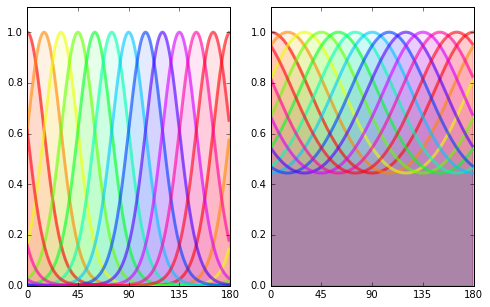

In [6]:
import matplotlib.pyplot as plt

def envelope(th, theta, B_theta):
    if B_theta==np.inf:
        env = np.ones_like(th) 
    elif B_theta==0:
        env = np.zeros_like(th)
        env[np.argmin(th < theta)] = 1.
    else:
        env = np.exp((np.cos(2*(th-theta))-1)/4/B_theta**2)
    return env/env.max()        

N_theta = 12
bins = 180
th = np.linspace(0, np.pi, bins, endpoint=False)
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
for i, B_theta_ in enumerate([np.pi/12, np.pi/4]):#[0, np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2, np.inf]:
    for theta, color in zip(np.linspace(0, np.pi, N_theta, endpoint=False), 
                            [plt.cm.hsv(h) for h in np.linspace(0, 1, N_theta)]):
        axs[i].plot(th*180/np.pi, envelope(th, theta, B_theta_), alpha=.6, color=color, lw=3)
        axs[i].fill_between(th*180/np.pi, 0, envelope(th, theta, B_theta_), alpha=.1, color=color)
    axs[i].set_xlim([0, 180])
    axs[i].set_ylim([0, 1.1])
    axs[i].set_xticks(np.linspace(0, 180, 5, endpoint=True) )#to specify number of tick…
fig.savefig('../figs/tuning_functions.png', dpi = 600)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow
from matplotlib.colors import hsv_to_rgb

def model(future=False):
    fig = plt.figure(figsize=(8, 8))

    ax2 = fig.add_subplot(111, alpha=0., axis_bgcolor=(1,1,1,0))
    ax = fig.add_subplot(111, projection='polar', alpha=0., axis_bgcolor=(1,1,1,0))

    opts= dict(ha='center', fontsize=14)
    N = 24
    s = 42
    theta = np.linspace(0, 2*np.pi, N+1, endpoint=True)

    ## connexions
    N_arrow = 3
    dthetas = alphas = np.linspace(-N_arrow, N_arrow, 2*N_arrow+1, endpoint=True)
    dthetas *= 1.75*np.pi/N
    alphas = np.exp( - alphas**2/ .4**2 / 2)
    #print(alphas)
    for dtheta, alpha in zip(dthetas, alphas):
        plt.arrow(np.pi/2, 1.4, dtheta, -.2, color='k', alpha=alpha)

        plt.arrow(0, 1.1, dtheta, -.1, color='r', alpha=alpha)
        plt.arrow(0, 1.1, dtheta, 0., color='r', alpha=alpha)

        plt.arrow(np.pi, .9, dtheta, .1, color='b', alpha=alpha)
        plt.arrow(np.pi, .9, dtheta, 0., color='b', alpha=alpha)
        #set_connectionstyle("arc,angleA=0,armA=30,rad=10")
        #set_arrowstyle("Fancy,head_length=0.2")

    ## neurones
    colors = theta
    for r, c in zip([.9, 1.1, 1.4], ['b', 'r', 'k']):
        ax.plot(theta, r*np.ones_like(theta), c=c, alpha=.4)
        c = ax.scatter(theta[:-1], r*np.ones_like(theta[:-1]), c=c, s=s)
        #c.set_alpha(0.15)

    ## entrée
    N = 1080
    theta = np.linspace(0, 2*np.pi, N)
    ax.fill_between(theta, 1.45, 1.45 + envelope(theta/2, np.pi/4, np.pi/24)/2.5, lw=0, color='g', alpha=.3)

    ax.set_ylim((0, 1.85))

    ax.text(-np.pi/2, 1.25, 'Excitateurs', **opts)
    ax.text(-np.pi/2, .8, 'Inhibiteurs', **opts)
    if future:

        ax.text(np.pi/2, 1.6, 'Entrée\ndirectionnelle', **opts)
        ax.text(-np.pi/2, 1.55, 'convergence corticale', **opts)
    else:
        
        ax.text(np.pi/2, 1.6, 'Entrée\norientationnelle', **opts)
        ax.text(-np.pi/2, 1.55, 'convergence thalamo-corticale', **opts)

    N = 12
    for theta in np.linspace(0, 2*np.pi, N, endpoint=False):
        r, angle, l = .15, theta, .1
        if future:
            ax2.add_patch(Arrow((r-l/2)*np.sin(angle)+.5, (r-l/2)*np.cos(angle)+.5, l*np.sin(angle), l*np.cos(angle), width=.06, color='k'))
        else:
            ax2.add_patch(Rectangle([r*np.sin(angle)+.5, r*np.cos(angle)+.5], .01, .04, angle=theta/2*180/np.pi, color=hsv_to_rgb([theta/2/np.pi, 1, 1])))            

    for ax_ in [ax, ax2]:
        ax_.grid(False, axis='both')

        ax_.set_xticks([])
        ax_.set_yticks([])
        ax_.set_axis_off()
    
    fig.subplots_adjust(hspace = .0, wspace = .0, left=0.01, bottom=0.01, right=.99, top=.99)
    return fig, ax

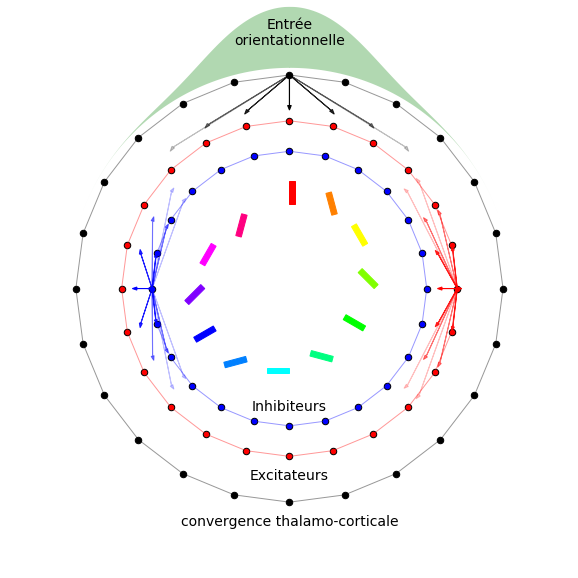

In [8]:
fig, ax = model()
fig.savefig('../figs/ring_model.png', dpi=600)

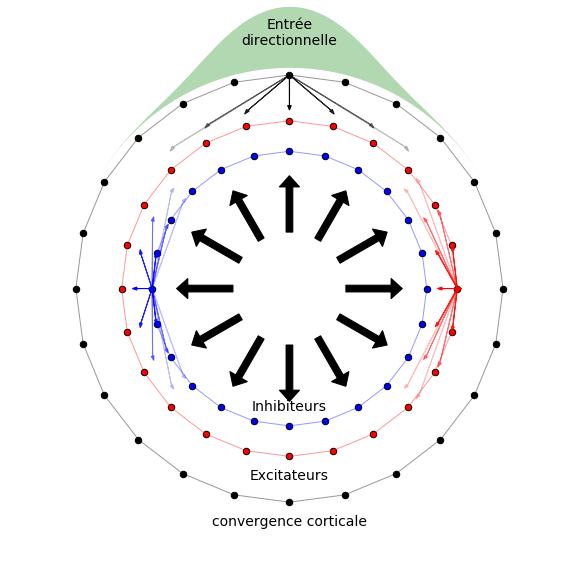

In [9]:
fig, ax = model(future=True)
fig.savefig('../figs/future_model.png', dpi=600)

### more code

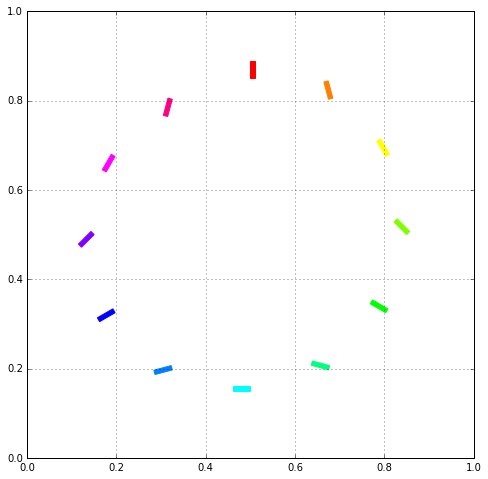

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

N = 12
s = 42
for theta in np.linspace(0, 2*np.pi, N, endpoint=False):
    r, angle = .35, theta#
    ax.add_patch(Rectangle([r*np.sin(angle-0.*np.pi/N/2)+.5, r*np.cos(angle-0.*np.pi/N/2)+.5], .01, .04, angle=theta/2*180/np.pi, color=hsv_to_rgb([theta/2/np.pi, 1, 1])))

ax.grid(True, axis='both')

#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_axis_off()
#fig.tight_layout()

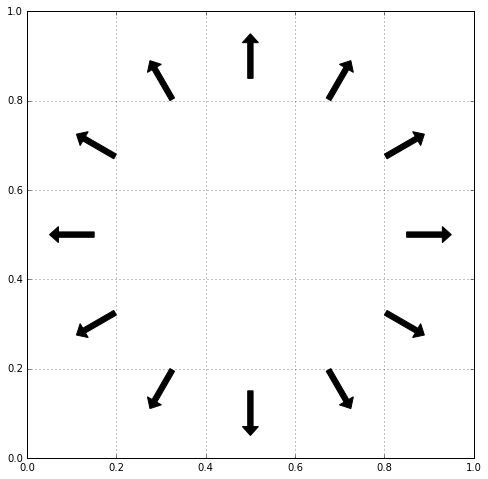

In [11]:
from matplotlib.patches import Rectangle
from matplotlib.colors import hsv_to_rgb
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)

N = 12
s = 42
for theta in np.linspace(0, 2*np.pi, N, endpoint=False):
    r, angle, l = .35, theta, .1
    ax.add_patch(Arrow(r*np.sin(angle)+.5, r*np.cos(angle)+.5, l*np.sin(angle), l*np.cos(angle), width=.06, color='k'))

ax.grid(True, axis='both')

#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_axis_off()
#fig.tight_layout()

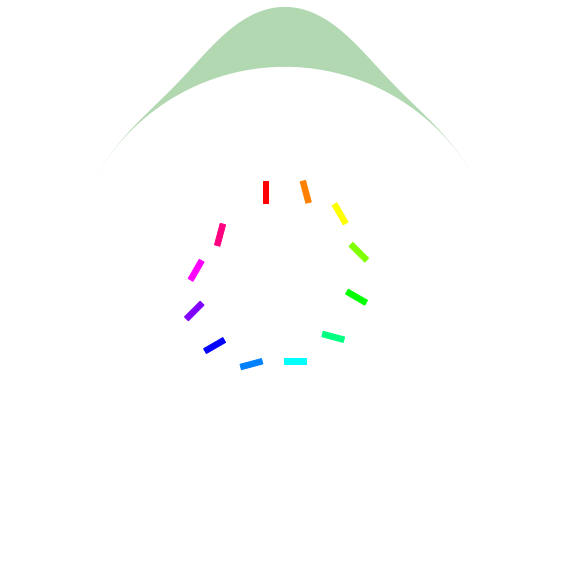

In [12]:

fig = plt.figure(figsize=(8, 8))

ax2 = fig.add_subplot(111, alpha=0., axis_bgcolor=(1,1,1,0))
ax = fig.add_subplot(111, projection='polar', alpha=0., axis_bgcolor=(1,1,1,0))

ax2.grid(False, axis='both')

## entrée
N = 1080
theta = np.linspace(0, 2*np.pi, N)
ax.fill_between(theta, 1.45, 1.45 + envelope(theta/2, np.pi/4, np.pi/24)/2.5, lw=0, color='g', alpha=.3)


N = 12
s = 42
for theta in np.linspace(0, 2*np.pi, N, endpoint=False):
    r, angle = .15, theta#
    ax2.add_patch(Rectangle([r*np.sin(angle-np.pi/N)+.5, r*np.cos(angle-np.pi/N)+.5], .01, .04, angle=theta/2*180/np.pi, color=hsv_to_rgb([theta/2/np.pi, 1, 1])))

for ax_ in [ax, ax2]:
    ax_.grid(False, axis='both')

    ax_.set_xticks([])
    ax_.set_yticks([])
    ax_.set_axis_off()
fig.tight_layout()    